In [426]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wholesale = pd.read_excel('Wholesale customers data.xlsx')
wholesale.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

# EDA and Cleaning 

In [427]:
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [428]:
wholesale.shape

(440, 8)

In [429]:
#Checking Null
wholesale.isnull().sum()
#no Null values 

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [430]:
wholesale.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

# Histogram

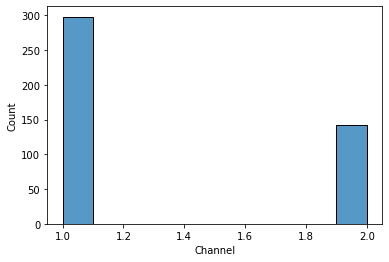

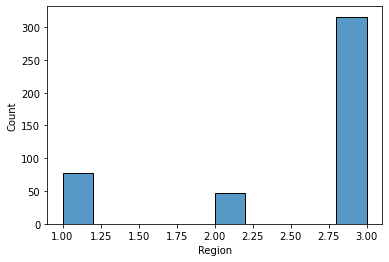

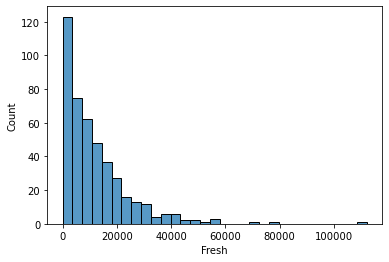

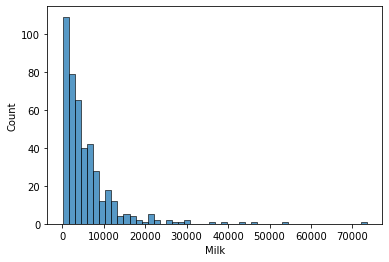

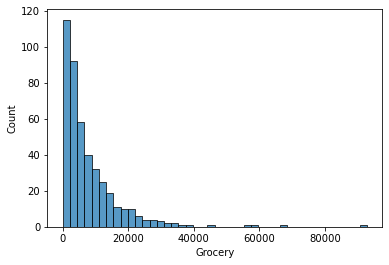

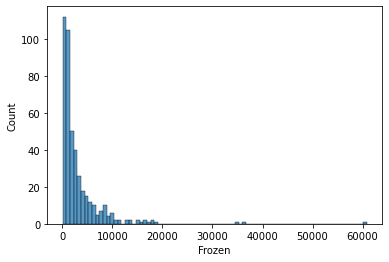

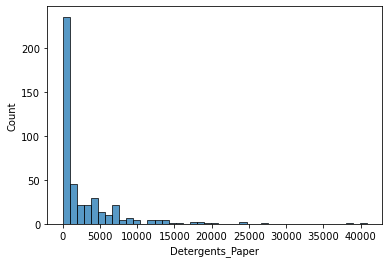

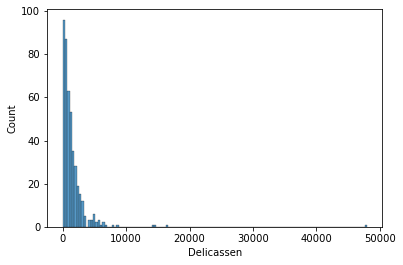

In [431]:
for i, col in enumerate(wholesale.columns):
    plt.figure(i)
    sns.histplot(x=col, data=wholesale)

In [432]:
wholesale_drop = wholesale.drop(['Channel', 'Region'], axis=1)

In [433]:
wholesale_drop

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]

# MinMaxScaler

In [434]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler_wholesale = MinMaxScaler()
min_max_scaled_wholesale  = min_max_scaler_wholesale.fit_transform(wholesale_drop)
print(min_max_scaled_wholesale)

[[0.11294004 0.13072723 0.08146416 0.0031063  0.0654272  0.02784731]
 [0.06289903 0.13282409 0.10309667 0.02854842 0.08058985 0.03698373]
 [0.05662161 0.11918086 0.08278992 0.03911643 0.08605232 0.16355861]
 ...
 [0.1295431  0.21013575 0.32594285 0.00677142 0.36346267 0.03888194]
 [0.091727   0.02622442 0.02402535 0.01664914 0.00404174 0.04426366]
 [0.02482434 0.02237109 0.02702178 0.00065742 0.01161082 0.00102211]]


# StandardScaler

In [435]:
from sklearn.preprocessing import StandardScaler

standard_scaler_wholesale = StandardScaler()
standard_scaled_wholesale = standard_scaler_wholesale.fit_transform(wholesale_drop)
print(standard_scaled_wholesale)

[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


We are going to StandardScaler because this dataset looks a normal distribution from the following analysis

# RFECV

In [436]:
wholesale.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [437]:
X = wholesale.drop(['Channel'],axis=1)
y = wholesale['Channel']

In [438]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [439]:
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform (X_test)

In [440]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
selector = RFECV(estimator, step=1, cv=5,  min_features_to_select= 3)
selector = selector.fit(X_train , y_train)

Optimal number of features : 6


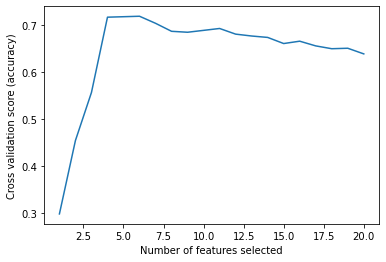

In [441]:
#number of features VS. cross-validation scores
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [442]:
selector.score(X_train,y_train)

1.0

# K-Means Clustering

In [443]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(standard_scaled_wholesale)
    Sum_of_squared_distances.append(km.inertia_)

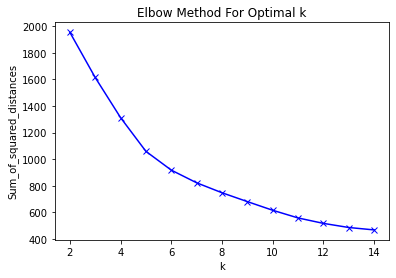

In [444]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Optimum number of clusters = 6

# PCA

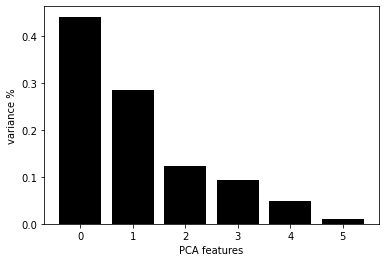

In [445]:
from sklearn.decomposition import PCA
pca = PCA()
Components = pca.fit_transform(standard_scaled_wholesale)

# Plot
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features) 
PCA_components = pd.DataFrame(Components)

In [446]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.04761272,
       0.01049519])

In [447]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

([<matplotlib.axis.XTick at 0x7fcf8c877af0>,
 [Text(0, 0, ''), Text(0, 0, '')])

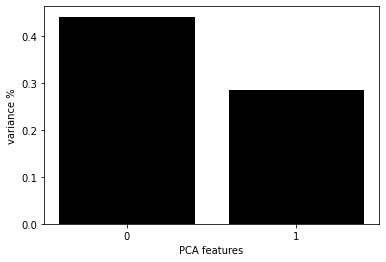

In [448]:
#First two components
pca = PCA(n_components=2)
two_Components = pca.fit_transform(standard_scaled_wholesale)

# Plot
features_2 = range(pca.n_components_)
plt.bar(features_2, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features_2)

In [449]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  ])

In [450]:
pca.explained_variance_ratio_.sum()

0.7245929240774496

([<matplotlib.axis.XTick at 0x7fcf8c801be0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

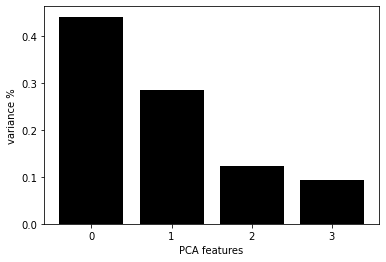

In [451]:
#First four components
pca = PCA(n_components=4)
four_Components = pca.fit_transform(standard_scaled_wholesale)

# Plot
features_4 = range(pca.n_components_)
plt.bar(features_4, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features_4)

In [452]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  , 0.12334413, 0.09395504])

In [453]:
pca.explained_variance_ratio_.sum()

0.9418920905750293

In the above observations we can clearly see that index 0 has the highest variance which is the Fresh Product Category and we can see large variance difference between the diverse product category

#  XGBoost Classifier

In [454]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
import numpy as np

In [455]:
#Performance Metrics
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), np.std(n_scores)))
model.fit(X_train, y_train)

Accuracy: 0.917 (0.048)


GradientBoostingClassifier()

In [456]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [457]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
for val in [model]:
    y_pred = val.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred,average='micro'), 3)
    recall = round(recall_score(y_val, y_pred,average='micro'), 3)
    print('A: {} / P: {} / R: {}'.format(accuracy,precision,recall))

A: 0.891 / P: 0.891 / R: 0.891
